# ОБУЧЕНИЕ МОДЕЛИ
21 Февраля 2020

## Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import re
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('main_task.csv')

In [3]:
df.describe(include='object')

,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,40000,40000,30717,26114,40000,40000,40000
unique,11909,31,9007,3,33516,39980,39980
top,id_633,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g187514-d793170-Reviews-Car...,d11999956
freq,18,5757,1032,18412,6471,2,2


In [4]:
df.describe()

,Ranking,Rating,Number of Reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


## Очистка данных и формирования новых признаков

#### Очистка обучающей выборки от дублей
Дубли определяются по идентификатору ресторана в базе данных TripAdvisor (ID_TA). Судя по описанию датасета df.describe(include='object') дублей 20 штук. После удаления дублей значения в столбце Restaurant_id будут заменены на значения из ID_TA, поскольку наблюдается большое количество ресторанов (причем даже из разных городов!!) с одинаковым Restaurant_id

In [5]:
# Поиск дублей для анализа
df_dubl = df.groupby(['ID_TA'])['ID_TA'].count()
display(list(df_dubl[df_dubl == 2].index))

['d10047799',
 'd11674463',
 'd11698990',
 'd11921719',
 'd11999956',
 'd13002276',
 'd1315077',
 'd2477531',
 'd3161682',
 'd3685055',
 'd4600226',
 'd697406',
 'd7337366',
 'd7342803',
 'd7809594',
 'd793170',
 'd8753348',
 'd9802625',
 'd9877640',
 'd987900']

In [6]:
# Просмотр дублированных строк - для уверенности. 
# Что удивительно - все дубли в Мадриде!
[display(df[df['ID_TA'] == id_ta]) for id_ta in list(df_dubl[df_dubl == 2].index)]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
13980,id_3239,Madrid,NaN,3241.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799
38946,id_3242,Madrid,NaN,3244.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
4732,id_3804,Madrid,"['American', 'German', 'European', 'Central Eu...",3806.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463
11583,id_3810,Madrid,"['American', 'German', 'European', 'Central Eu...",3812.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
26431,id_3238,Madrid,NaN,3240.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990
26551,id_3240,Madrid,NaN,3242.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
10819,id_2197,Madrid,NaN,2199.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719
12628,id_2329,Madrid,NaN,2331.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
16920,id_3536,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3538.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956
29879,id_3662,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3664.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
1579,id_2673,Madrid,['American'],2675.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276
26696,id_2485,Madrid,['American'],2487.0,5.0,$,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
10439,id_468,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",469.0,4.0,$$ - $$$,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077
25785,id_511,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",512.0,4.0,$$ - $$$,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
8421,id_3811,Madrid,['Spanish'],3813.0,4.0,$,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531
24545,id_3805,Madrid,['Spanish'],3807.0,4.0,$,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
25251,id_3575,Madrid,"['Spanish', 'Bar']",3577.0,3.5,$,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682
39847,id_3709,Madrid,"['Spanish', 'Bar']",3711.0,3.5,$,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3942,id_5646,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5649.0,3.5,$$ - $$$,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055
27680,id_5617,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5620.0,3.5,$$ - $$$,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
147,id_4110,Madrid,['Spanish'],4112.0,5.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226
9446,id_4104,Madrid,['Spanish'],4106.0,5.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
4578,id_1180,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1181.0,4.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406
28096,id_1209,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1210.0,4.0,$$ - $$$,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
10183,id_1225,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1227.0,4.0,$$ - $$$,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366
32814,id_1197,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1198.0,4.0,$$ - $$$,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
22924,id_2359,Madrid,"['Spanish', 'Mediterranean']",2361.0,4.5,$$ - $$$,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803
36275,id_2467,Madrid,"['Spanish', 'Mediterranean']",2469.0,4.5,$$ - $$$,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
15525,id_3967,Madrid,"['American', 'Spanish', 'Asian']",3969.0,3.5,NaN,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594
19388,id_4331,Madrid,"['American', 'Spanish', 'Asian']",4333.0,3.5,NaN,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
5240,id_2406,Madrid,"['Italian', 'French', 'European']",2408.0,4.0,$$ - $$$,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170
36822,id_2487,Madrid,"['Italian', 'French', 'European']",2489.0,4.0,$$ - $$$,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
13942,id_1103,Madrid,['Spanish'],1104.0,4.5,$$ - $$$,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348
31238,id_1212,Madrid,['Spanish'],1213.0,4.5,$$ - $$$,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
10594,id_2677,Madrid,NaN,2679.0,5.0,NaN,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625
12938,id_2486,Madrid,NaN,2488.0,5.0,NaN,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
15295,id_475,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640
15565,id_530,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
8019,id_2361,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2363.0,4.0,$$ - $$$,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900
22998,id_2312,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2314.0,4.0,$$ - $$$,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
# Безвозвратное удаление дублей по столбцу ID_TA
df.drop_duplicates(subset = 'ID_TA', inplace = True)

display(df.describe(include='object'))

,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,39980,39980,30701,26101,39980,39980,39980
unique,11907,31,9007,3,33516,39980,39980
top,id_633,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g187791-d3754630-Reviews-Lu...,d9728824
freq,18,5757,1032,18402,6465,1,1


In [8]:
# Замена значений в столбце Restaurant_id на значения из ID_TA
df['Restaurant_id'] = df['ID_TA']

# Поскольку номера строк остались прежними и, следовательно,
# появились пропуски в нумерации -> надо переименовывать
df.index = list(range(0, df.shape[0]))
display(df.describe(include='object'))

,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,39980,39980,30701,26101,39980,39980,39980
unique,39980,31,9007,3,33516,39980,39980
top,d9728824,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g187791-d3754630-Reviews-Lu...,d9728824
freq,1,5757,1032,18402,6465,1,1


### Функции для очистки данных и формирования новых признаков

#### Функция посдсчета пустых значений в строке

In [9]:
def NaN_count(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Столбцы датафрейма
    colList = list(DataFrame.columns)
    
    # Добавление столбца с количеством неопределенных 
    # значений для расторана
    DataFrame['#NaN'] = 0
    
    # Добавление вместо пустующих значений просмотров Reviews - NAN
    DataFrame.loc[df.Reviews == '[[], []]', 'Reviews'] = np.nan
    
    # Просмотр датафрейма по столбцам
    for col in colList:
        DataFrame.loc[DataFrame[col].isna(), '#NaN'] += 1
    
    return DataFrame

#### Фукция определения столичного города

In [10]:
def notCap(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Список не столичных городов (не ясно почему Эдинбург 
    # относится к столичным городам, хотя не является столицей 
    # автономного государства):
    notCapitals = ['Milan', 'Munich', 'Geneva', 
                   'Zurich', 'Hamburg', 'Lyon', 
                   'Oporto', 'Krakow', 'Barcelona']
    
    # Добавление 2х столбцов - для столицы и Не столицы
    DataFrame['IsNotCapital'] = 0
    DataFrame['IsCapital'] = 0
    
    for ii in range(0, DataFrame.shape[0]):
        if DataFrame.loc[ii, 'City'] in notCapitals:
            DataFrame.loc[ii, 'IsNotCapital'] += 1
        else:
            DataFrame.loc[ii, 'IsCapital'] += 1
            
    return DataFrame


#### Функция определения коэффициента обратного числу ресторанов в городе

In [11]:
def CityRestCompetition(DF):    
    '''
    Функция определяет коэффициент, обратный общему количеству 
    ресторанов в городе. Коэффициент "конкурентности". 
    Или что-то типа того
    '''
    # Копирование 
    DataFrame = DF.copy()
    
    # Группировка количества ресторанов по городам
    CityGrouped_df = DataFrame.groupby(['City'])['Restaurant_id'].count()
    
    # Добавление нулевого столбца:
    DataFrame['CityRestComp'] = 0
    
    # Заполнение столбца
    for ii in range(0, DataFrame.shape[0]):
        DataFrame.loc[ii, 'CityRestComp'] = \
            1 / CityGrouped_df[DataFrame.loc[ii, 'City']]
        
    return DataFrame


#### Обработка NaN в столбце Number of Reviews

In [12]:
# Строки с nan заполняются значениями mean для каждого отдельного города 
# и ценовой категории ресторана. Но в ряде случаев данные могут 
# отсутствовать как в столбце Number of Reviews, так и в Price Range

def NumOfRev_NaN_clean(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Разбивка столбца Number of Rev по городам и диапазонам стоимости
    NoR_pivot = DataFrame.pivot_table(values = ['Number of Reviews'], 
                          index = ['City'], 
                          columns = ['Price Range'],
                          aggfunc = 'mean')
    
    # Разбивка столбца Number of Rev по городам
    NoR_in_Citys = DataFrame.groupby(['City'])['Number of Reviews'].mean()
    
    # Если в ячейках Number of Reviews и Price Range NaN:
    NoR_nan = DataFrame['Number of Reviews'].isna()
    PR_nan = DataFrame['Price Range'].isna()
    
    # Изменение элементов
    for ii in range(0, DataFrame.shape[0]):
        if NoR_nan[ii] and not PR_nan[ii]:
            DataFrame.loc[ii, 'Number of Reviews'] = \
                NoR_pivot.loc[DataFrame.loc[ii, 'City']]\
                                ['Number of Reviews']\
                                [DataFrame.loc[ii, 'Price Range']]
        elif NoR_nan[ii] and PR_nan[ii]:
            DataFrame.loc[ii, 'Number of Reviews'] = \
                NoR_in_Citys[DataFrame.loc[ii, 'City']]
    else:
        return DataFrame


#### Обработка диапазона стоимости ресторана

In [13]:
# В исходном DF стоимость в ресторане - категориальный признак, 
# возможно, целесообразно преобразовать это все в числовые
# $ - менее 10$ (среднее 5)
# $$ - $$$ - 11-30$ (среднее 20)
# $$$$ - более 31$

def PriceTransform(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Нулевые элементы столбца с диапазонами цены
    notNull = DataFrame['Price Range'].notnull()
    for ii in range(0, DataFrame.shape[0]):
        if notNull[ii]:
            if DataFrame.loc[ii, 'Price Range'] == '$':
                DataFrame.loc[ii, 'Price Range'] = 5.0
            elif DataFrame.loc[ii, 'Price Range'] == '$$ - $$$':
                DataFrame.loc[ii, 'Price Range'] = 20.0
            elif DataFrame.loc[ii, 'Price Range'] == '$$$$':
                DataFrame.loc[ii, 'Price Range'] = 35.0
        else:
            DataFrame.loc[ii, 'Price Range'] = 10.0
    else:
        return DataFrame
    
# df_test = PriceTransform(df)
# display(df_test)

# df['Price Range'].apply(lambda x: x.replace('$', '5'))
# df['Price Range'].apply(lambda x: x.replace('$$ - $$$', '20'))
# df['Price Range'].apply(lambda x: x.replace('$$$$', '31'))

## Обрабтка столбца с кухнями

#### Количество кухонь в ресторане

In [14]:
def CuisineQuantity(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Нулевой столбец с количеством видов кухни для каждого ресторана
    DataFrame['Cuisine Style Options'] = 0
    
    # Непустые строки DF
    CuisineNotNaN = DataFrame['Cuisine Style'].notnull()
    
    # Шаблон для выделения кухонь
    cuisinePattern = re.compile('\w+\s*\w*\s*\w*')
    
    for ii in range(0, DataFrame.shape[0]):
        if CuisineNotNaN[ii]:
            cuisineListTMP = \
                re.findall(cuisinePattern, \
                           DataFrame.loc[ii, 'Cuisine Style'])
            nTmp = len(cuisineListTMP)
            # Добавление количества кухонь в DF
            DataFrame.loc[ii, 'Cuisine Style Options'] = nTmp
        else:
            df.loc[ii, 'Cuisine Style Options'] = 1
    else:
        return DataFrame


#### Подготовка словаря  с типами кухонь
Словарь формируется с учетом всех значений типов кухонь. Поскольку в тренировочном датасете типов кухонь больше, то за основу берется именно этот словарь - т.е. он же учитывается и в датасете kaggle.
Кроме типов кухонь, добавляется столбец с неопределенным типом - UnknownCuisineStyle

In [15]:
# Заготовка словаря с типами кухонь:
cuisineStyleDict = {}

# Шаблон для поиска типов кухонь:
cuisinePattern = re.compile('\w+\s*\w*\s*\w*')

# Подсчет ненулевых элементами в колонке 'Cuisine Style'
notNULLvect = df['Cuisine Style'].notnull()

# Неизвестные стили
cuisineStyleDict['UnknownCuisineStyle'] = 0

# Формирование словаря:
for ii in range(0, df.shape[0]):
    if notNULLvect[ii]:
        cuisineListTMP = \
            re.findall(cuisinePattern, df.loc[ii, 'Cuisine Style'])
        nTmp = len(cuisineListTMP)
        # Добавление кухонь в общий словарь
        for jj in range(0, nTmp):
            if cuisineListTMP[jj] in cuisineStyleDict.keys():
                cuisineStyleDict[cuisineListTMP[jj]] += 1
            else:
                cuisineStyleDict[cuisineListTMP[jj]] = 1
    else:
        # Если тип кухни неизвестен
        cuisineStyleDict['UnknownCuisineStyle'] += 1
        

#### Функция для формирования dammy признаков с типами кухонь

In [16]:
def CuisineDammy(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Глобальные переменные - список типов кухни
    global cuisineStyleDict, cuisinePattern
    
    # Подсчет ненулевых элементами в колонке 'Cuisine Style'
    notNULLvect = DataFrame['Cuisine Style'].notnull()
    
    # Список типов кухонь:
    cuisineStyleList = list(cuisineStyleDict.keys())
    
    # Формирование столбцов с наименованием типов кухонь в DataSet
    # Добавление столбцов с наименованием типов кухонь в датасет
    for ii in range(0, len(list(cuisineStyleDict.keys()))):
        DataFrame[cuisineStyleList[ii]] = 0
        
    # Заполнение столбцов:
    for ii in range(0, DataFrame.shape[0]):
        if notNULLvect[ii]:
            cuisineListTMP = \
                re.findall(cuisinePattern, 
                           DataFrame.loc[ii, 'Cuisine Style'])
            nTmp = len(cuisineListTMP)
            
            # Добавление кухонь в датасет
            for cuisine in cuisineListTMP:
                DataFrame.loc[ii, cuisine] += 1
                
        else:
            DataFrame.loc[ii, 'UnknownCuisineStyle'] += 1
    
    return DataFrame


#### Преобразование данных по кухням
Вместо единиц в dammy-столбцы вносятся коэффициенты 1/N, где N - количество ресторанов с таким же типом кухни в городе

Должна быть обработка пустых значений в стилях кухонь

In [17]:
# Функция для преобразования
def CuisineDammyTransform(DF):
    # Копирование 
    DataFrame = DF.copy()
    
    # Глобальные переменные:
    global cuisineStyleDict
    
    # Подсчет ненулевых элементами в колонке 'Cuisine Style'
    notNULLvect = DataFrame['Cuisine Style'].notnull()
    
    # Список типов кухонь без UnknownCuisineStyle:
    cuisineStyleList = list(cuisineStyleDict.keys())[1:]
    
    # Группировка по городам - суммирование по строкам
    df_def_group = \
        DataFrame.groupby(['City']).sum()[cuisineStyleList]
    
    # Преобразование столбцов:
    for ii in range(0, DataFrame.shape[0]):
        if notNULLvect[ii]:
            indexNotNull = \
                (DataFrame.loc[[ii]][cuisineStyleList] == 1).values[0]
            CuisineStyleList_tmp = \
                [cuisineStyleList[x] for x in range(0, len(indexNotNull)) 
                    if indexNotNull[x]]
            for s in CuisineStyleList_tmp:
                City_tmp = DataFrame.loc[ii, 'City']
                DataFrame.loc[ii, s] = \
                    df_def_group.loc[City_tmp, s]
    else:
        return DataFrame


## Обработка дат - не использовалось, поскольку ухудшает прогноз, а удалить жалко :(

In [18]:
# Функция обработки столбца Reviews
def ReviewsTreatment(DF):
    # Копирование 
    DataFrame = DF.copy()
    
#     # Добавление вместо пустующих значений просмотров Reviews - NAN
#     DataFrame.loc[df.Reviews == '[[], []]', 'Reviews'] = np.nan
    
    # Ненулевые элементы столбца Reviews
    ReviewsNotNaN = DataFrame['Reviews'].notnull()
    
    # Паттерн для обработки дат отзывов:
    ReviewsPattern = re.compile('\d+/\d+/\d+')
    
    # Столбцы в DF для первого, второго отзывов и числа дней между отзывами
    DataFrame['FirstRev'] = 0
    DataFrame['SecondRev'] = 0
    DataFrame['deltaDays'] = 0
    
    # Сегодняшняя дата
    today = datetime.datetime.now().date()
    
    # Заполнение столбцов:
    for ii in range(0, DataFrame.shape[0]):
        if ReviewsNotNaN[ii]:
            doubleDateList = re.findall(ReviewsPattern, 
                                        DataFrame.loc[ii, 'Reviews'])
            if len(doubleDateList) >= 2:
                FirstRevTMP = \
                    list(map(int, doubleDateList[-1].split('/')))
                SecondRevTMP = \
                    list(map(int, doubleDateList[-2].split('/')))
                    
                DataFrame.loc[ii, 'FirstRev'] = \
                    datetime.date(FirstRevTMP[2], 
                                  FirstRevTMP[0], 
                                  FirstRevTMP[1])
                DataFrame.loc[ii, 'SecondRev'] = \
                    datetime.date(SecondRevTMP[2], 
                                  SecondRevTMP[0], 
                                  SecondRevTMP[1])
                
                DataFrame.loc[ii, 'deltaDays'] = \
                    (DataFrame.loc[ii, 'SecondRev'] - 
                     DataFrame.loc[ii, 'FirstRev']).days
                
                # Проверка правильной последовательности дат - 
                # ВОЗМОЖНО ЭТИ ДАННЫЕ ВООБЩЕ ПОДЛЕЖАТ УДАЛЕНИЮ
                if DataFrame.loc[ii, 'deltaDays'] < 0:
                    
                    DataFrame.loc[ii, 'FirstRev'], 
                    DataFrame.loc[ii, 'SecondRev'] = \
                    DataFrame.loc[ii, 'SecondRev'], 
                    DataFrame.loc[ii, 'FirstRev']
                        
                    DataFrame.loc[ii, 'deltaDays'] = \
                        (DataFrame.loc[ii, 'SecondRev'] - 
                         DataFrame.loc[ii, 'FirstRev']).days
                
            elif len(doubleDateList) == 1:
                FirstRevTMP = \
                    list(map(int, doubleDateList[0].split('/')))
                    
                DataFrame.loc[ii, 'FirstRev'] = \
                    datetime.date(FirstRevTMP[2], 
                                  FirstRevTMP[0], 
                                  FirstRevTMP[1])
                
                DataFrame.loc[ii, 'SecondRev'] = today
                
                DataFrame.loc[ii, 'deltaDays'] = \
                    (DataFrame.loc[ii, 'SecondRev'] - 
                     DataFrame.loc[ii, 'FirstRev']).days
                
        else:
            # Если данные об отзывах отсутствуют - 
            # вводятся дата осноания TripAdvisor и Сегодняшняя дата
            # СОМНИТЕЛЬНАЯ МАНИПУЛЯЦИЯ!!
            DataFrame.loc[ii, 'FirstRev'] = datetime.date(2000, 2, 1)
            DataFrame.loc[ii, 'SecondRev'] = today
            DataFrame.loc[ii, 'deltaDays'] = \
                (DataFrame.loc[ii, 'SecondRev'] - 
                 DataFrame.loc[ii, 'FirstRev']).days
    else:
        return DataFrame

# Подготовка данных



In [19]:
df01 = NaN_count(df)
df02 = notCap(df01)
df03 = CityRestCompetition(df02)
df04 = NumOfRev_NaN_clean(df03)
df05 = PriceTransform(df04)
df06 = CuisineQuantity(df05)
df07 = CuisineDammy(df06)
df08 = CuisineDammyTransform(df07)
# df09 = ReviewsTreatment(df08)

In [20]:
df_ready = df08.copy()

#### Удаление категориальных элементов

In [21]:
display(df_ready)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
0,d1912643,Paris,"['European', 'French', 'International']",5570.0,3.5,20,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,0,0,0,0,0,0,0,0,0
1,d7992032,Stockholm,NaN,1537.0,4.0,10,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,0,0,0,0,0,0
2,d8632781,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,35,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,0,0,0
3,d1358776,Berlin,NaN,3458.0,5.0,10,3.0,NaN,/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,0,0
4,d6864963,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,20,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,d2104414,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,20,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,...,0,0,0,0,0,0,0,0,0,0
39976,d1800036,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,20,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,...,0,0,0,0,0,0,0,0,0,0
39977,d947615,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,10,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,...,0,0,0,0,0,0,0,0,0,0
39978,d1100838,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,20,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_ready.describe(include=['object'])

,Restaurant_id,City,Cuisine Style,Reviews,URL_TA,ID_TA
count,39980,39980,30701,33515,39980,39980
unique,39980,31,9007,33515,39980,39980
top,d10458959,London,['Italian'],"[['Live a little! Go to Roma!', 'Disappointing...",/Restaurant_Review-g186338-d5617536-Reviews-Im...,d10458959
freq,1,5757,1032,1,1,1


In [22]:
# Очищенный DF - удаление категориальных столбцов
# df_ready2 = df_ready.drop(['City', 'Cuisine Style', 'Reviews', 
#                   'URL_TA', 'ID_TA', 'FirstRev', 'SecondRev'], axis = 1)

df_ready2 = df_ready.drop(['City', 'Cuisine Style', 'Reviews', 
                  'URL_TA', 'ID_TA'], axis = 1)

In [23]:
df_ready2.isnull().describe()

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,#NaN,IsNotCapital,IsCapital,CityRestComp,Cuisine Style Options,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
count,39980,39980,39980,39980,39980,39980,39980,39980,39980,39980,...,39980,39980,39980,39980,39980,39980,39980,39980,39980,39980
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,39980,39980,39980,39980,39980,39980,39980,39980,39980,39980,...,39980,39980,39980,39980,39980,39980,39980,39980,39980,39980


In [24]:
df_ready2.describe(include = ['object'])

,Restaurant_id
count,39980
unique,39980
top,d9728824
freq,1


## Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [25]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_ready2.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df_ready2['Rating']

In [26]:
display(y.describe())

count    39980.000000
mean         3.992909
std          0.668471
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [27]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [28]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Для kaggle не используется тестовый набор данных. Весь исходный набор
# идет на обучение модели
X_train, y_train = X, y

In [29]:
display(X_train.describe())

,Ranking,Price Range,Number of Reviews,#NaN,IsNotCapital,IsCapital,CityRestComp,Cuisine Style Options,UnknownCuisineStyle,European,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
count,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,...,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000,39980.000000
mean,3676.497249,14.707729,124.545194,0.804552,0.239520,0.760480,0.000775,2.390795,0.232091,133.172236,...,0.000175,0.000025,0.000025,0.000100,0.000125,0.000025,0.000025,0.000050,0.000050,0.000025
std,3709.500590,7.073649,286.614402,1.136859,0.426796,0.426796,0.000758,2.058064,0.422172,286.048173,...,0.016587,0.005001,0.005001,0.010002,0.011183,0.005001,0.005001,0.007073,0.007073,0.005001
min,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000174,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,973.000000,10.000000,10.000000,0.000000,0.000000,1.000000,0.000204,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2284.000000,10.000000,38.000000,0.000000,0.000000,1.000000,0.000469,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5261.000000,20.000000,124.028861,2.000000,0.000000,1.000000,0.001120,4.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16444.000000,35.000000,9660.000000,4.000000,1.000000,1.000000,0.005464,21.000000,1.000000,1247.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Создаём, обучаем и тестируем модель

In [30]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [32]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
# РАСЧЕТ НИЖЕ ПРОВОДИТСЯ НА ЭТАПЕ ОТРАБОТКИ МОДЕЛИ

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21462831415707853


In [26]:
# РЕЗУЛЬТАТЫ РАСЧЕТА МЕТРИК ДЛЯ РАЗЛИЧНЫХ ФУНКЦИЙ
# MAE: 0.21436750000000002 - Стоимость. Неизвестные рестораны - 20
# MAE: 0.21934449999999997 - неизвестные рестораны - 25
# MAE: 0.214254 - 15
# MAE: 0.2138115 - 10
# MAE: 0.21404249999999997 - 5
# MAE: 0.2163791895947974 - dammy типов кухонь
# MAE: 0.21236518259129566 - без дат, но с dammy типов

# KAGGLE

## Подготовка DF для соревнований

In [33]:
# Данные для предсказания - в соревнованиях
df_k = pd.read_csv('kaggle_task.csv')

# Данные не содержат дублей
display(df_k.describe(include = 'object'))

,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,10000,10000,7693,6525,9998,10000,10000
unique,10000,31,3128,3,8358,10000,10000
top,id_3940,London,['Italian'],$$ - $$$,"[[], []]",/Restaurant_Review-g186338-d12429452-Reviews-B...,d7800254
freq,1,1436,300,4629,1641,1,1


In [34]:
# Применение функций для преобразования kaggle_DF
df01_k = NaN_count(df_k)
df02_k = notCap(df01_k)
df03_k = CityRestCompetition(df02_k)
df04_k = NumOfRev_NaN_clean(df03_k)
df05_k = PriceTransform(df04_k)
df06_k = CuisineQuantity(df05_k)
df07_k = CuisineDammy(df06_k)
df08_k = CuisineDammyTransform(df07_k)
# df09_k = ReviewsTreatment(df08_k)

In [35]:
df_ready_k = df08_k.copy()

## Удаление категориальных элементов

In [36]:
display(df_ready_k)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,#NaN,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
0,id_0,Paris,"['Bar', 'Pub']",12963.0,20,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,20,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,20,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,35,202.0,NaN,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,1,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,35,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,5,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827,0,...,0,0,0,0,0,0,0,0,0,0
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,20,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633,0,...,0,0,0,0,0,0,0,0,0,0
9997,id_9997,Milan,NaN,5562.0,10,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194,2,...,0,0,0,0,0,0,0,0,0,0
9998,id_9998,Milan,['Italian'],4010.0,10,2.0,NaN,/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815,2,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_ready_k.describe(include=['object'])

,Restaurant_id,City,Cuisine Style,Reviews,URL_TA,ID_TA
count,10000,10000,7693,8434,10000,10000
unique,10000,31,3128,7058,10000,10000
top,id_3940,London,['Italian'],"[[], []]",/Restaurant_Review-g186338-d12429452-Reviews-B...,d7800254
freq,1,1436,300,1377,1,1


In [38]:
# df_ready2_k = df_ready_k.drop(['City', 'Cuisine Style', 'Reviews', 
#                   'URL_TA', 'ID_TA', 'FirstRev', 'SecondRev'], axis = 1)

# Удаление категориальных элементов
df_ready2_k = df_ready_k.drop(['City', 'Cuisine Style', 'Reviews', 
                  'URL_TA', 'ID_TA'], axis = 1)


In [40]:
df_ready2_k.isnull().describe()

,Restaurant_id,Ranking,Price Range,Number of Reviews,#NaN,IsNotCapital,IsCapital,CityRestComp,Cuisine Style Options,UnknownCuisineStyle,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [41]:
df_ready2_k.describe(include = ['object'])

,Restaurant_id
count,10000
unique,10000
top,id_3940
freq,1


In [45]:
X_k = df_ready2_k.drop(['Restaurant_id'], axis = 1)
display(X_k)

,Ranking,Price Range,Number of Reviews,#NaN,IsNotCapital,IsCapital,CityRestComp,Cuisine Style Options,UnknownCuisineStyle,European,...,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian
0,12963.0,20,4.0,0,0,1,0.000826,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106.0,20,97.0,0,0,1,0.010101,5,0,38,...,0,0,0,0,0,0,0,0,0,0
2,810.0,20,28.0,0,0,1,0.006711,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1669.0,35,202.0,1,0,1,0.000696,5,0,200,...,0,0,0,0,0,0,0,0,0,0
4,37.0,35,162.0,0,0,1,0.012658,6,0,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4367.0,5,28.0,0,0,1,0.000696,4,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,2612.0,20,2.0,0,0,1,0.002882,4,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5562.0,10,2.0,2,1,0,0.001783,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,4010.0,10,2.0,2,1,0,0.001783,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Использование модели для предсказания

In [59]:
# Использование модели для предсказания рейтинга ресторанов в соревновательной 
# выборке. Предсказанные значения записываем в переменную rating_k
rating_k = regr.predict(X_k)

In [126]:
# Формирование DF с результатами
predSeries = pd.Series(rating_k, name='Rating')
pred_DF = pd.concat([df08_k['Restaurant_id'], predSeries], axis = 1)

In [127]:
display(pred_DF)

,Restaurant_id,Rating
0,id_0,3.050
1,id_1,4.070
2,id_2,2.930
3,id_3,4.555
4,id_4,4.400
...,...,...
9995,id_9995,1.440
9996,id_9996,1.775
9997,id_9997,1.295
9998,id_9998,1.385


In [128]:
# Запись результатов в файл
pred_DF.to_csv('20200221_TEST.csv', index = False)

# Проверка решения

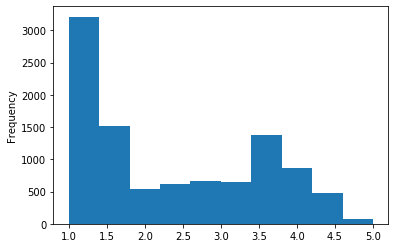

In [129]:
pred_DF['Rating'].plot(kind='hist')

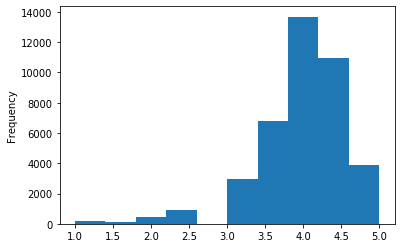

In [132]:
df['Rating'].plot(kind='hist')

Расределение рейтингов полученное на исходных данных kaggle не соответствует распределению учебного датасета. Явная ошибка!!